<a href="https://colab.research.google.com/github/Whizkid1/Self_taught/blob/main/R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R-CNN 계열의 backbone이며, 대표적인 object detector
- Object detection
    - (Multi-Labeled): classification + localization 

어떤 물체인지 클래스를 분류하고, 그 물체가 어디 
있는 박스(label)을 통해 위치 정보를 나타낸다.

- 논문 : https://arxiv.org/abs/1311.2524

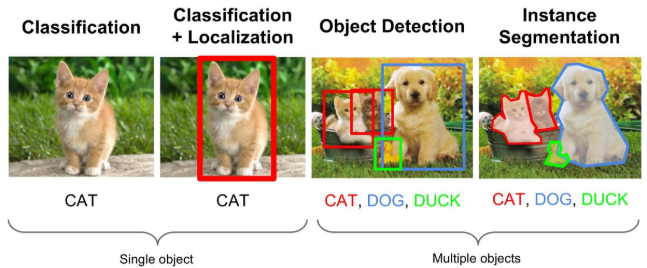

- **Classification** : Single object에 대해서 object의 클래스를 분류하는 문제이다.
- **Classification + Localization** : Single object에 대해서 object의 위치를 bounding box로 찾고 (Localization) +
클래스를 분류하는 문제이다. (Classification)
- **Object Detection** : Multiple objects에서 각각의 object에 대해 Classification + Localization을 수행하는 것이다.
- **Instance Segmentation** : Object Detection과 유사하지만, 다른점은 object의 위치를
bounding box가 아닌 실제 edge로 찾는 것이다.

# R-CNN
Regions with Convolutioanl Neuron Networks features

1. R-CNN은 object detection 분야에서 딥러닝 최초 모델
2. 1-stage detection, 2-stage detection의 개념을 먼저 공부(R-CNN은 1-stage)
3. AlexNet을 사용했기 때문에 간단하게 개념 공부
4. SVM, bBox reg 공부
5. 1-stage YOLO 추후 공부

# 2-stage detection

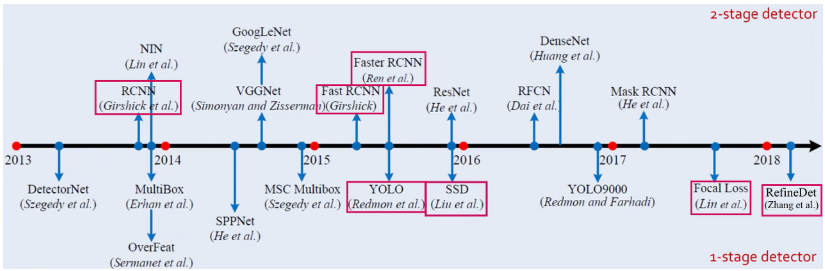

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import urllib.request

def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype='uint8')
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)

  return image

image = url_to_image('https://blog.kakaocdn.net/dn/rd2Ho/btqBcxO6C0m/MCINIrwGAnzMjevTDOqKJ0/img.png')

cv2_imshow(image)

- 2-stage detection: 
    - Regional Proposal -> Classification (순차적 진행: 즉, 2단계 순서에 맞게 차례로 진행)
    - 1-stage는 2가지 단계가 동시 진행
    - 2-SD는 정확도가 높지만 속도가 느리다.


# Region Proposal

- bounding box 만들기 (약 2000개 생성)
    1. Sliding window : 사용X
        - object를 찾기 위해 다양한 크기의 window를 바꾸며 모든 영역을 탐색
    2. Selective search : R-CNN에서 사용
        - non-object-based segmentation : 랜덤하게 작은 box들을 생성한다
        - Bottom-up 그룹핑 알고리즘을 통해 box들을 합하여 segmented area를 만든다.
        - regions of interest(ROI) 형식


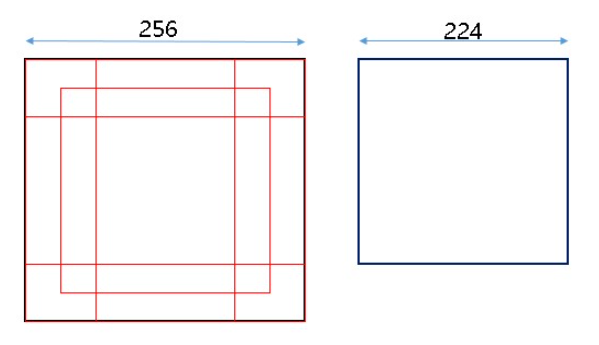


# CNN(Alexnet)

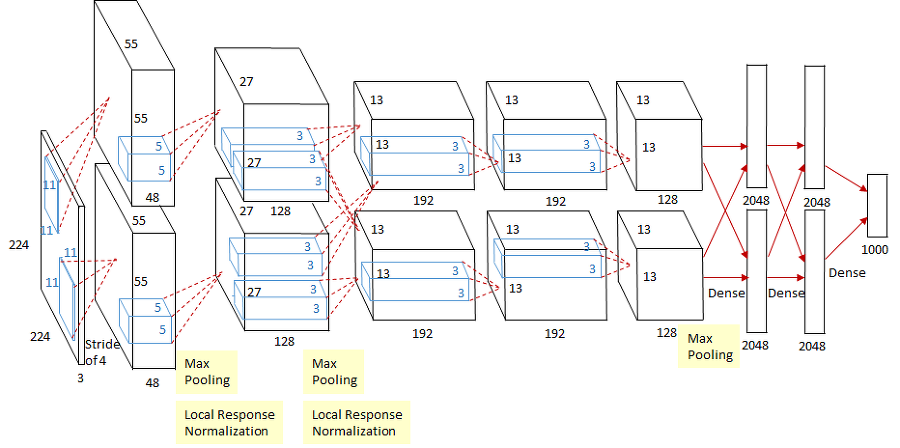

- Alexnet는 GPU의 한계를 극복하기 위한 구조를 이루고 있다.(위의 사진을 봤을 때 병렬구조를 사용한 이유)
- 5개 convlayer, 3개의 FCL(마지막 FCL은 1000개의 카테고리(VGG16 논문의 모델 구조에서 설명과 유사하다!!)

- 간단한 Alexnet review
    1. wraping을 통해 입력영상의 크기가 227x227로 영상 크기를 통일시켜야 한다.(augmentation 적용과 연관이 있는데 VGG에서도 느꼈듯 원본의 크기에서 input의 크기를 조절함으로 Random Crops로 사진의 증강효과를 볼 수 있다는 것에 또 한번 배움을 느낀다.)
    2. 다른 모델에 비해 input크기가 커 filter(kernel)의 크기가 클 수 있었다.(대신 stride가 4)
    3. GPU-1은 RGB와 상관없는 feature추출, GPU-2는 color와 관련된 정보 추출
    4. 성/능 향상을 위해 ReLU, dropout을 사용
        - FCL의 처음 2개에만 적용
    5. 256 -> 227(1번에서 이어서-논문에서는 2048개의 추가 영상을 얻을 수 있다고 햤다.)
    6. wraping 으로 5개 + 상하좌우 및 중앙으로부터 반전한 이미지 5개 = 10개의 이미즈를 softmax 출력을 평균하는 방법을 사용

CNN(AlexNet)을 거쳐 각각의 region proposal로 부터 4096개의 차원 feature 벡터를 추출해서 고정길이의 Feature vector을 만들어 낸다.

# SVM
Support Vector Machine


Alexnet은 softmax을 사용했지만, 논문에서는 Linear SVM을 활용하여 classification 했다.( 저자는 경험에 의해...지금은 softmax가 많이 사용되는데 말이지...)
1.   C-SVM(추후공부): https://ratsgo.github.io/machine%20learning/2017/05/29/SVM2/




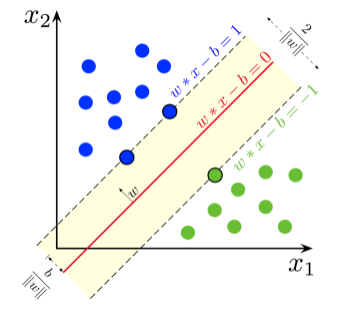

## Intersection over Union, IoU
객체 인식 모델의 성능 평가를 하는 과정에서 사용되는 도구
- 참조 사이트 : 
        1. https://ballentain.tistory.com/12
        2. https://www.cnblogs.com/jins-note/p/11674770.html
    - CNN fine-tuning : IoU가 0.5가 넘으면 positive이라고, 이 외에는 "background" label
    - SVM을 학습할 때 ground-truth boxes만 positive example, IoU가 0.3미만인 영역은 모두 negative, 나머지는 전부 무시

## Bounding Box Regression 
Selective Search로 만들어낸 Bounding Box의 
Localization 성능을 향상시키기 위해 사용(추후 공부)
https://better-tomorrow.tistory.com/entry/Bounding-box-regression

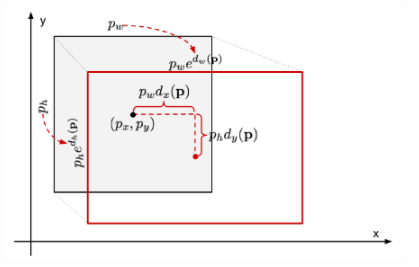

# 단점
1. 피쳐와 이미지의 영역 개수가 많아 시간이 너무 오래 걸린다.
2. 모델이 너무 복잡하다(이거 구현 어찌하냐...ㅠ)
3. 역전파가 안된다.(이유:  Multi-Stage Training, SVM, Bounding Box Regression)
